In [265]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [130]:
data=pd.read_json('ultimate_data_challenge.json',orient='columns')
data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [131]:
logins_df=pd.read_json('logins.json',orient='columns')
logins_df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


Part 1 - Exploratory data analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15minute
time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

In [132]:
logins_df = logins_df.sort_values('login_time') 
logins_df = logins_df.reset_index(drop=True)

In [133]:
logins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [134]:
logins_df.describe()

,login_time
count,93142
unique,92265
top,1970-04-04 01:17:40
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


This dataset contains 93142 entries, from 1970-01-01 20:12:16 till 1970-04-13 18:57:38.

In [135]:
#add a numerical column to aggregate
logins_df['count']=1

In [136]:
logins_df.set_index('login_time', inplace=True)

In [137]:
# Resample in 15minute time interval
df_15T = logins_df.resample('15T').sum()

In [138]:
df_15T.head()

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


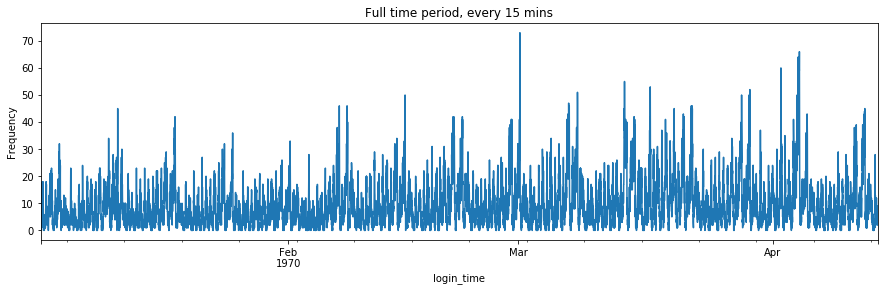

In [139]:
logins_df['count'].resample('15T').sum().plot(figsize=(15,4))
plt.ylabel('Frequency')
plt.title('Full time period, every 15 mins')
plt.show;

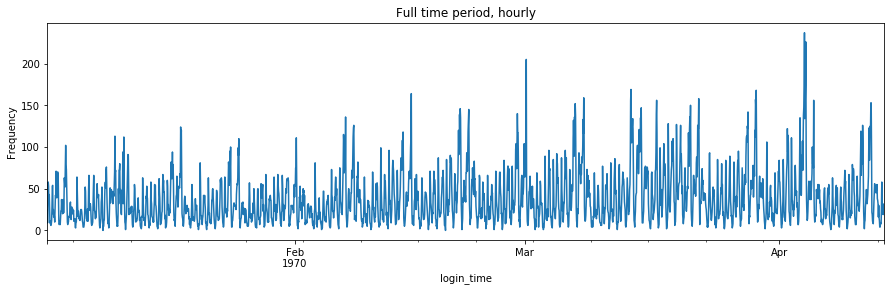

In [140]:
logins_df['count'].resample('1H').sum().plot(figsize=(15,4))
plt.ylabel('Frequency')
plt.title('Full time period, hourly')
plt.show;

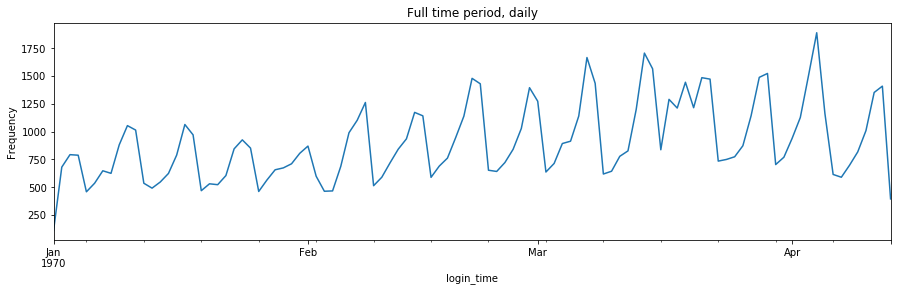

In [141]:
logins_df['count'].resample('1D').sum().plot(figsize=(15,4))
plt.ylabel('Frequency')
plt.title('Full time period, daily')
plt.show;

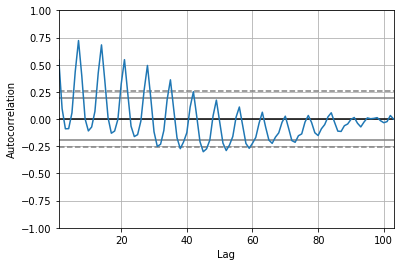

In [142]:
#Corelation
pd.plotting.autocorrelation_plot(logins_df['count'].resample('1D').sum())

This produces an autocorrelation plot: the correlation of a time series with itself at a range of lag times. We have applied it to the downsampled daily time series. Since the cadence of the time series is one day, the “Lag” axis is measured in days. The first peak (after a lag of 0) is around 7days, meaning that the series correlates well with itself after a week, and 2 weeks and so on for subsequent peaks. 

In [177]:
weekdays=logins_df['count'].resample('1D').sum()
weekdays = weekdays.reset_index()
#weekdays['weekday'] = weekdays['login_time'].dt.weekday
weekdays['weekday'] = weekdays['login_time'].dt.strftime("%A")

df2=weekdays.groupby('weekday').sum()
df2 = df2.astype(int)
df2.sort_values(by=['count'], inplace=True)
df2

,count
weekday,
Monday,8823
Tuesday,9268
Wednesday,10339
Thursday,11960
Friday,15208
Sunday,18167
Saturday,19377


Index(['weekday', 'hour', 'count'], dtype='object')


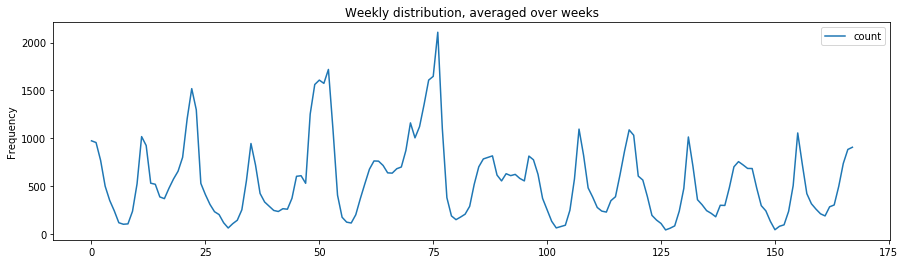

In [241]:
hours=logins_df['count'].resample('1H').sum()
hours = hours.reset_index()
#weekdays['weekday'] = weekdays['login_time'].dt.weekday
hours['weekday'] = hours['login_time'].dt.strftime("%A")
hours['hour'] = hours['login_time'].dt.strftime("%H")


df3=hours.groupby(['weekday','hour']).sum()
df3 = df3.reset_index()
print(df3.columns)

df3.plot(figsize=(15,4))
plt.ylabel('Frequency')
plt.title('Weekly distribution, averaged over weeks')
plt.show;





In [242]:
print(df3.loc[df3['weekday'] == 'Monday'])


   weekday hour  count
24  Monday   00    531
25  Monday   01    414
26  Monday   02    312
27  Monday   03    236
28  Monday   04    206
29  Monday   05    121
30  Monday   06     66
31  Monday   07    111
32  Monday   08    147
33  Monday   09    256
34  Monday   10    558
35  Monday   11    947
36  Monday   12    722
37  Monday   13    426
38  Monday   14    337
39  Monday   15    293
40  Monday   16    249
41  Monday   17    238
42  Monday   18    267
43  Monday   19    262
44  Monday   20    376
45  Monday   21    605
46  Monday   22    611
47  Monday   23    532


In [245]:
print(df3.loc[df3['weekday'] == 'Friday'])


   weekday hour  count
0   Friday   00    975
1   Friday   01    957
2   Friday   02    771
3   Friday   03    502
4   Friday   04    353
5   Friday   05    245
6   Friday   06    121
7   Friday   07    105
8   Friday   08    109
9   Friday   09    240
10  Friday   10    527
11  Friday   11   1019
12  Friday   12    926
13  Friday   13    533
14  Friday   14    522
15  Friday   15    390
16  Friday   16    372
17  Friday   17    480
18  Friday   18    577
19  Friday   19    658
20  Friday   20    803
21  Friday   21   1206
22  Friday   22   1519
23  Friday   23   1298


In [243]:
print(df3.loc[df3['weekday'] == 'Saturday'])


     weekday hour  count
48  Saturday   00   1254
49  Saturday   01   1562
50  Saturday   02   1608
51  Saturday   03   1574
52  Saturday   04   1719
53  Saturday   05   1093
54  Saturday   06    408
55  Saturday   07    178
56  Saturday   08    127
57  Saturday   09    118
58  Saturday   10    204
59  Saturday   11    372
60  Saturday   12    528
61  Saturday   13    679
62  Saturday   14    765
63  Saturday   15    763
64  Saturday   16    718
65  Saturday   17    641
66  Saturday   18    638
67  Saturday   19    684
68  Saturday   20    702
69  Saturday   21    874
70  Saturday   22   1162
71  Saturday   23   1006


In [244]:
print(df3.loc[df3['weekday'] == 'Sunday'])


   weekday hour  count
72  Sunday   00   1123
73  Sunday   01   1355
74  Sunday   02   1608
75  Sunday   03   1647
76  Sunday   04   2107
77  Sunday   05   1102
78  Sunday   06    382
79  Sunday   07    192
80  Sunday   08    153
81  Sunday   09    180
82  Sunday   10    210
83  Sunday   11    292
84  Sunday   12    522
85  Sunday   13    704
86  Sunday   14    786
87  Sunday   15    802
88  Sunday   16    818
89  Sunday   17    618
90  Sunday   18    557
91  Sunday   19    632
92  Sunday   20    612
93  Sunday   21    625
94  Sunday   22    583
95  Sunday   23    557


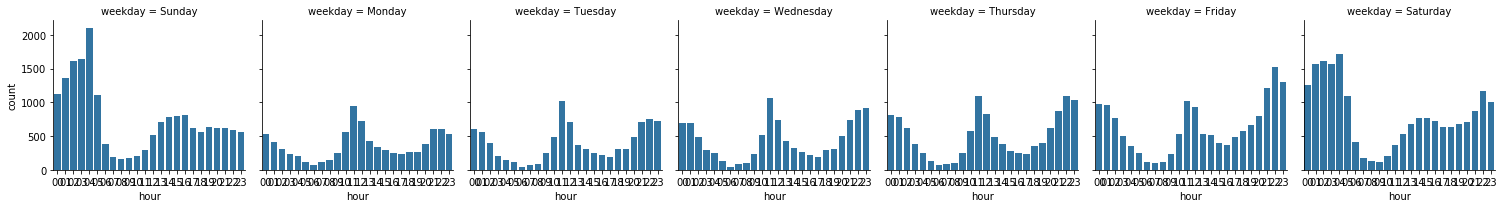

In [252]:
# create facet grid
g = sns.FacetGrid(data=df3.reset_index(),
    col='weekday', col_order=[
    'Sunday',
    'Monday',
    'Tuesday',
    'Wednesday',
    'Thursday',
    'Friday',
    'Saturday'
], col_wrap=7)

# map barplot to each subplot
g.map(sns.barplot, 'hour', 'count');

The frequency of login counts goes down from Sunday midnight till about 5 am on weekdays. Subsequently, it goes up till about noon, after which it again decreases till about 4pm. We observe an increase in demand from about 4 pm till midnight on weekdays. Additionally, there are more login counts during the latter part of the week (Wednesday, Thursday, and Friday) than earlier in the week. We can see there's an increase in demand during noon and late evening till midnight during weekdays.

We see a sharp increase in login counts on Friday around 9-10pm, and continues with high frequency till about 5am following day. A similar pattern can be seen on Saturday evenings. Sunday night counts are on the same scale as weekday nights. 

We also observe that Saturday reports the highest login counts, followed by Sunday, Friday and Thursday respectively. Overall, the login count frequency gradually increases from Monday till Sunday. 

Part 2 ‑ Experiment and metrics design

However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

Answer: 
The key measure of success of this experiment in encouraging driver partners to serve both cities would be the average profit per driver when the driver has driven to both cities. This metric was chosen as profit is the driving force for a driver partner to take on a task. Additionally, this metric would give a very clear idea whether it's worthwhile to implement this experiment in the long-term. 


2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
a. how you will implement the experiment?

Answer:
I would implement the experiment by getting equal random samples of drivers who are:
A: exclusive to one city (control), and, 
B: drivers who has access to both cities with toll costs reimbursed (experiement) 

This can be implemented by oferring a toll reimbursement promotion to the randomly selected drivers beforehand. This experiment should be carried out for at least two weeks to reduce variance. The average profit for each group of drivers can be calculated for further analysis. 


b. what statistical test(s) you will conduct to verify the significance of the observation?

Answer:
We can implement an A/B test with the following hypothesis with a significance level of 0.05:

Null Hypothesis: $$H_0: \mu_(experiment) - \mu_(control) = 0$$
                        Paying toll costs do not affect the driver earnings


Alternate Hypothesis: $$H_1: \mu_(experiment) - \mu_(control) > 0$$
                        Paying toll costs has a positive effect on the driver earnings

At the end of experiment time, we can compute the p-values and perform a t-test to verify the significance of the observation. 

c. how you would interpret the results and provide recommendations to the city operations team along with any caveats?

Answer:
In carrying out the above experiment, it was assumed that the driver earnings are independent of which city an individual is located. From the test statistics, we can compute the significance of the mean difference for a given level of significance (typically set at 5%). If the mean difference is statistically significant, we can reject the null hypothesis in favor of the alternate hypothesis. 


Part 3 ‑ Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its longterm
rider retention (again, a few sentences will suffice).

Data description:

● city: city this user signed up in

● phone: primary device for this user

● signup_date: date of account registration; in the form ‘YYYY MM DD’

● last_trip_date: the last time this user completed a trip; in the form ‘YYYY MM DD’

● avg_dist: the average distance in miles per trip taken in the first 30 days after signup

● avg_rating_by_driver: the rider’s average rating over all of their trips

● avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips

● surge_pct: the percent of trips taken with surge multiplier > 1

● avg_surge: The average surge multiplier over all of this user’s trips

● trips_in_first_30_days: the number of trips this user took in the first 30 days after
signing up

● ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days;
FALSE otherwise

● weekday_pct: the percent of the user’s trips occurring during a weekday

In [255]:
df=pd.read_json('ultimate_data_challenge.json',orient='columns')
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [262]:
df.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

We notice there are null values in the avg_rating_of_driver, avg_rating_by_driver, and phone columns. 

In [259]:
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])

In [260]:
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [263]:
df.phone.value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

We see that about 2/3 of the users and iPhone users, while the rest are Android users. 

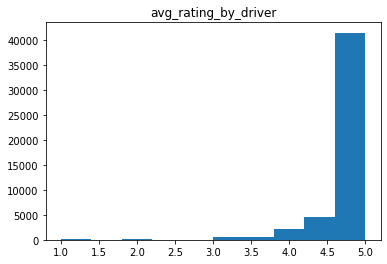

In [268]:
plt.hist(df[np.logical_not(df['avg_rating_by_driver'].isnull())]['avg_rating_by_driver'])
plt.title('avg_rating_by_driver')
plt.show;

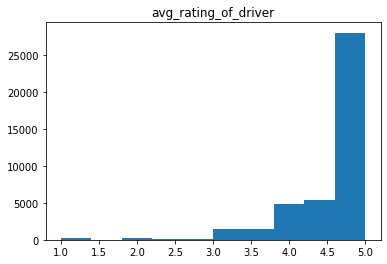

In [269]:
plt.hist(df[np.logical_not(df['avg_rating_of_driver'].isnull())]['avg_rating_of_driver'])
plt.title('avg_rating_of_driver')
plt.show;

In [274]:
#Impute missing values by using the mean for rating columns and mode for phone type. 


df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].mean(), inplace=True)
df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].mean(), inplace=True)
df['phone'].fillna('iPhone', inplace=True)

In [275]:
df['signup_date'].describe()

count                   50000
unique                     31
top       2014-01-18 00:00:00
freq                     2948
first     2014-01-01 00:00:00
last      2014-01-31 00:00:00
Name: signup_date, dtype: object

In [276]:
df['last_trip_date'].describe()

count                   50000
unique                    182
top       2014-06-29 00:00:00
freq                     2036
first     2014-01-01 00:00:00
last      2014-07-01 00:00:00
Name: last_trip_date, dtype: object

We can see the users in this dataset are those who signed up in Junaruay, 2014 and took trips with Ultimate till July, 2014. 

In [281]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    50000 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   50000 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    50000 non-null  float64       
 12  retained                50000 non-null  bool  

In [277]:
categorical_features = ['city', 'phone', 'ultimate_black_user']

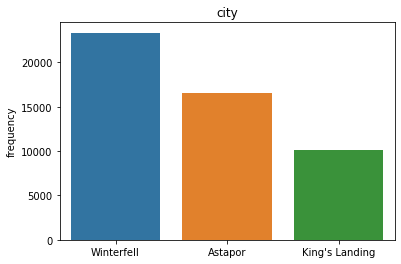

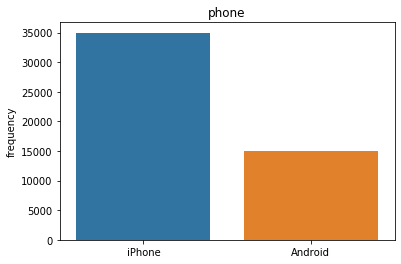

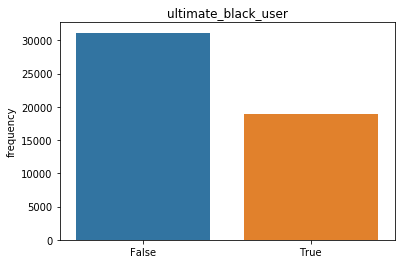

In [278]:
#EDA for categorical features
for feature in categorical_features:
    sns.barplot(x = list(df[np.logical_not(df[feature].isnull())][feature].value_counts().index), 
                y = df[np.logical_not(df[feature].isnull())][feature].value_counts())
    plt.title(feature)
    plt.ylabel('frequency')
    plt.show();

In [279]:
#Define activer users as those who took a trip within the last 30 days

cutoffdate = df.last_trip_date.max() - pd.Timedelta('30 days')
df['retained'] = df.last_trip_date.apply(lambda x: True if x >= cutoffdate else False)

In [280]:
#Fraction of retained users
df.retained.sum()/len(df)

0.37608

Hence, a fraction of 37.6% of observed users were retained. 

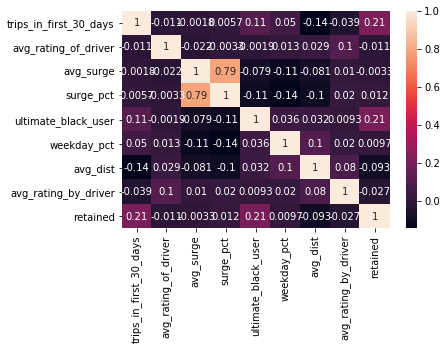

In [286]:
sns.heatmap(df.corr(),annot=True);

The columns  'trips_in_first_30_days' shows the most positive correlations whereas the 'avg_dist' shows the most negative correlations. Several numerical columns only showing minor correlations, including 'avg_rating_by_driver' and 'avg_rating_of_driver' columns. 

In [ ]:
We will apply three different classification algorithms:
    
    1) Logistic Regression
    2) Suppor Vector Machines
    3) Random Forest Classifier

In [284]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [290]:
#As we have created the target features, let's drop the datetime features
df.drop('signup_date', axis=1, inplace=True)
df.drop('last_trip_date', axis=1, inplace=True)

In [291]:
#one hot encode categorical features

df_encoded = pd.get_dummies(df, columns = ['city', 'phone', 'ultimate_black_user'])
df_encoded.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,retained,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True
0,4,4.7,1.10,15.4,46.2,3.67,5.0,True,0,1,0,0,1,0,1
1,0,5.0,1.00,0.0,50.0,8.26,5.0,False,1,0,0,1,0,1,0
2,3,4.3,1.00,0.0,100.0,0.77,5.0,False,1,0,0,0,1,1,0
3,9,4.6,1.14,20.0,80.0,2.36,4.9,True,0,1,0,0,1,0,1
4,14,4.4,1.19,11.8,82.4,3.13,4.9,False,0,0,1,1,0,1,0


In [287]:
y_train = train_trimmed['time_to_answer']
y_train_log=np.log(y_train)
X_train=train_trimmed[train_trimmed.columns.difference(['time_to_answer'])]

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,city_King's Landing,city_Winterfell,phone_iPhone
0,4,2014-01-25,4.7,1.1,2014-06-17,15.4,True,46.2,3.67,5.0,1,0,1
1,0,2014-01-29,5.0,1.0,2014-05-05,0.0,False,50.0,8.26,5.0,0,0,0


In [294]:
y = df_encoded.retained
X = df_encoded.drop('retained',axis=1)
X.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True
0,4,4.7,1.10,15.4,46.2,3.67,5.0,0,1,0,0,1,0,1
1,0,5.0,1.00,0.0,50.0,8.26,5.0,1,0,0,1,0,1,0
2,3,4.3,1.00,0.0,100.0,0.77,5.0,1,0,0,0,1,1,0
3,9,4.6,1.14,20.0,80.0,2.36,4.9,0,1,0,0,1,0,1
4,14,4.4,1.19,11.8,82.4,3.13,4.9,0,0,1,1,0,1,0


In [295]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [304]:
# initiate the score table
index = ['LogisticRegression','SVC','RandomForestClassifier']
score_table = pd.DataFrame(index = index, columns= ['accuracy_train','f1_score_train','accuracy_test','f1_score_test'])

# define function for plotting the results
def compute_log_result(algo, pred_train, pred_test):
    """compute and log the performance for both training and test sets"""
    
    # compute the performance  
    accuracy_train = accuracy_score(y_train, pred_train)
    accuracy_test = accuracy_score(y_test, pred_test)
    f1_train = f1_score(y_train, pred_train)
    f1_test = f1_score(y_test, pred_test)
    
    # log the performance
    score_table.loc[algo,:] = accuracy_train, f1_train, accuracy_test, f1_test
    
    # compute confusion matrix and print
    print("Classification results based on the testset:\n", classification_report(y_test, pred_test))

In [305]:
#Logistic Regression

logit = Pipeline([('scaler', StandardScaler()),('logit',LogisticRegression())])
logit.fit(X_train, y_train)
pred_train = logit.predict(X_train)
pred_test = logit.predict(X_test)

# logging of model performance
compute_log_result("LogisticRegression", pred_train, pred_test)


Classification results based on the testset:
               precision    recall  f1-score   support

       False       0.74      0.85      0.79      7799
        True       0.66      0.50      0.57      4701

    accuracy                           0.72     12500
   macro avg       0.70      0.67      0.68     12500
weighted avg       0.71      0.72      0.71     12500



/Users/varuni/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [306]:
#SVM

svc = Pipeline([('scaler', StandardScaler()),('svc', SVC())])
svc.fit(X_train, y_train)
pred_train = svc.predict(X_train)
pred_test = svc.predict(X_test)

# logging of model performance
compute_log_result("SVC", pred_train, pred_test)

Classification results based on the testset:
               precision    recall  f1-score   support

       False       0.78      0.87      0.82      7799
        True       0.73      0.59      0.65      4701

    accuracy                           0.76     12500
   macro avg       0.75      0.73      0.74     12500
weighted avg       0.76      0.76      0.76     12500



In [307]:
#Random Forest

rfc = Pipeline([('scaler', StandardScaler()),('rfc', RandomForestClassifier(class_weight='balanced'))]) 
# set class_weight to adjust for the imbalanced classes
rfc.fit(X_train, y_train)
pred_train = rfc.predict(X_train)
pred_test = rfc.predict(X_test)

compute_log_result("RandomForestClassifier", pred_train, pred_test)


/Users/varuni/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Classification results based on the testset:
               precision    recall  f1-score   support

       False       0.78      0.84      0.81      7799
        True       0.69      0.61      0.65      4701

    accuracy                           0.75     12500
   macro avg       0.74      0.72      0.73     12500
weighted avg       0.75      0.75      0.75     12500



In [308]:
print(score_table)

                       accuracy_train f1_score_train accuracy_test  \
LogisticRegression           0.717413        0.56914       0.71592   
SVC                          0.773813       0.667894       0.76296   
RandomForestClassifier       0.976507       0.968221       0.75056   

                       f1_score_test  
LogisticRegression          0.567531  
SVC                         0.652597  
RandomForestClassifier      0.646485  


We observe that Random Forest CLassifier gives the best model performance. However, there is some degree of overfitting taking place. Let's apply cross validation and hyper parameter tuning to this model. 

In [309]:
parameters = {'rfc__n_estimators': [100, 200, 300],'rfc__max_features': ['log2', 'auto', 'sqrt'],'rfc__min_samples_leaf': [10, 30, 50]}
rfc_cv = GridSearchCV(rfc, parameters, scoring='accuracy', cv=5)
rfc_cv.fit(X_train, y_train)
print('Best parameters:', rfc_cv.best_params_)
print('Corresponding accuracy score:', rfc_cv.best_score_)

Best parameters: {'rfc__max_features': 'log2', 'rfc__min_samples_leaf': 10, 'rfc__n_estimators': 300}
Corresponding accuracy score: 0.7761333333333333


In [310]:
#Random Forest

rfc = Pipeline([('scaler', StandardScaler()),('rfc', RandomForestClassifier(class_weight='balanced',n_estimators=300,max_features= 'log2', min_samples_leaf=10 ))]) 
# set class_weight to adjust for the imbalanced classes
rfc.fit(X_train, y_train)
pred_train = rfc.predict(X_train)
pred_test = rfc.predict(X_test)

compute_log_result('RandomForestClassifier', pred_train, pred_test)


Classification results based on the testset:
               precision    recall  f1-score   support

       False       0.84      0.80      0.82      7799
        True       0.69      0.74      0.71      4701

    accuracy                           0.78     12500
   macro avg       0.76      0.77      0.76     12500
weighted avg       0.78      0.78      0.78     12500



In [311]:
print(score_table.loc['RandomForestClassifier'])

# feature importance ranking from the optimized GradientBoostingClassifier 
feature_rank = pd.DataFrame({'feature': X_train.columns, 'importance': rfc.named_steps.rfc.feature_importances_})
print(feature_rank.sort_values(by='importance',ascending=False))

accuracy_train    0.812347
f1_score_train    0.760801
accuracy_test      0.77568
f1_score_test     0.713351
Name: RandomForestClassifier, dtype: object
                      feature  importance
6        avg_rating_by_driver    0.166384
4                 weekday_pct    0.131481
3                   surge_pct    0.105356
8         city_King's Landing    0.104557
5                    avg_dist    0.098697
2                   avg_surge    0.081782
0      trips_in_first_30_days    0.072608
11               phone_iPhone    0.043857
10              phone_Android    0.041174
1        avg_rating_of_driver    0.040775
7                city_Astapor    0.033722
12  ultimate_black_user_False    0.032229
13   ultimate_black_user_True    0.028312
9             city_Winterfell    0.019066


This shows the cross validation has decreased the effects of overfitting and along with hyperparamter tuning, the model performance is also improved from the base model. The top 3 most predictive features are ranked as, avg_rating_by_driver, weekday_pct , and surge_pct, respectively, to indicate user retention upton 6 months after sign up.

Additionally, in order to improve user retention, following recommendations can be given:

1) Targeted marketing campaigns to users who are get lower ratings by driver, taking mostly weekday trips and at least one trip during surge pricing. 
2) Users from King's Landing city seems to have a higher chane of retention. Further studies should be done to the factors that differentiates King's Landing vs Astapor and Winterfell.
